# Regression using SciKitLearn
In this tutorial we are going to use an already clean dataset from the [Nomadlist Cities](https://nomadlist.com/) data to predict the continent where the city is located.

We are using [ScikitLearn library](https://scikit-learn.org/stable/index.html)

In [281]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

pd.set_option("display.float_format", "{:.3f}".format)

imports ok


In [282]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [283]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA_DataEncoding/LCA_df.csv')
print(data)

                                             Combination                 Code  \
0      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
1      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
2      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
3      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
4      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
...                                                  ...                  ...   
12631  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12632  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12633  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12634  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12635  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   

      EW_Code IW_Code ES_Co

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12636 entries, 0 to 12635
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Combination                   12636 non-null  object 
 1   Code                          12636 non-null  object 
 2   EW_Code                       12636 non-null  object 
 3   IW_Code                       12636 non-null  object 
 4   ES_Code                       12636 non-null  object 
 5   IS_Code                       12636 non-null  object 
 6   RO_Code                       12636 non-null  object 
 7   EW_A-D/m²                     12636 non-null  float64
 8   IW_A-D/m²                     12636 non-null  float64
 9   ES_A-D/m²                     12636 non-null  float64
 10  IS_A-D/m²                     12636 non-null  float64
 11  RO_A-D/m²                     12636 non-null  float64
 12  ITERATION                     12636 non-null  object 
 13  I

## Predicting LCA


Prepare data

In [285]:
# Select the (independant) features that we are going to use to train the model
#X = data.loc[:,['EW_Code','IW_Code','ES_Code', 'IS_Code', 'RO_Code', 'TOTAL_AREA', 'WALLS_M2' ,'VOLUME_M3','COMPACTNESS']]
#X = data.loc[:,['EW_Code','IW_Code','ES_Code', 'IS_Code', 'RO_Code', 'COMPACTNESS']]
#X = data.loc[:,['EW_Code','IW_Code','ES_Code', 'IS_Code', 'RO_Code' ,'VOLUME_M3','COMPACTNESS']]
X = data.loc[:,['EW_Code','IW_Code','ES_Code', 'IS_Code', 'RO_Code']]
X

,EW_Code,IW_Code,ES_Code,IS_Code,RO_Code
0,CON,CON,CON,CON,CON
1,CON,CON,CON,CON,CON
2,CON,CON,CON,CON,CON
3,CON,CON,CON,CON,CON
4,CON,CON,CON,CON,CON
...,...,...,...,...,...
12631,BRI,BRI,CON,TIF,TIF
12632,BRI,BRI,CON,TIF,TIF
12633,BRI,BRI,CON,TIF,TIF
12634,BRI,BRI,CON,TIF,TIF


In [286]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X['EW_Code'] = encoder.fit_transform(X['EW_Code'])
X['IW_Code'] = encoder.fit_transform(X['IW_Code'])
X['ES_Code'] = encoder.fit_transform(X['ES_Code'])
X['IS_Code'] = encoder.fit_transform(X['IS_Code'])
X['RO_Code'] = encoder.fit_transform(X['RO_Code'])

X

,EW_Code,IW_Code,ES_Code,IS_Code,RO_Code
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
12631,0,0,0,1,1
12632,0,0,0,1,1
12633,0,0,0,1,1
12634,0,0,0,1,1


In [287]:
# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

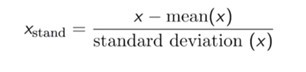

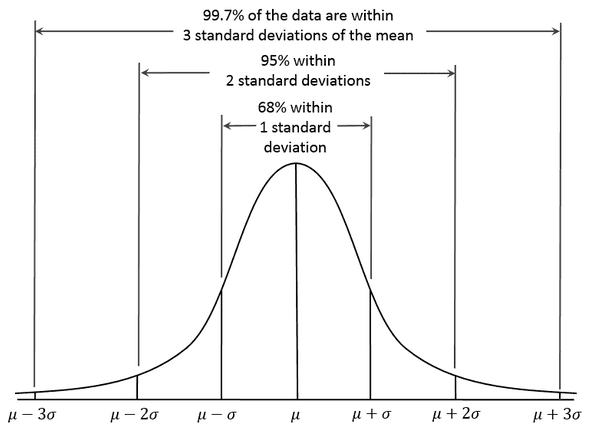

In [288]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [289]:
print(X_scaled.shape)

(12636, 5)


In [290]:
tdf = pd.DataFrame(X_scaled)

#print(type(X_scaled))
print(tdf.describe())

              0         1         2         3         4
count 12636.000 12636.000 12636.000 12636.000 12636.000
mean     -0.000     0.000     0.000    -0.000     0.000
std       1.000     1.000     0.000     1.000     1.000
min      -1.464    -1.464     0.000    -1.225    -1.225
25%      -0.878    -0.878     0.000    -1.225    -1.225
50%       0.000     0.000     0.000     0.000     0.000
75%       0.878     0.878     0.000     1.225     1.225
max       1.464     1.464     0.000     1.225     1.225


In [291]:
# Define the dependant variable / target to predict
y_reg = data['GWP_A-D'] # Access the column using brackets and the correct column name 'GWP_A-D'
print(y_reg)

0       106074.530
1       120050.180
2       122484.450
3       127051.910
4       113674.330
           ...    
12631    27486.740
12632    27791.940
12633    22554.700
12634    24404.940
12635    26976.700
Name: GWP_A-D, Length: 12636, dtype: float64


In [292]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [293]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(10108, 5)
(10108,)
(2528, 5)
(2528,)


Train model

In [294]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(model.score(X_test, y_test))
#Anything lower than 0.5 is not good. The aim is at least 0.5.

0.5209177852902744


In [295]:
print("Coefficient", model.coef_, "intercetp",  model.intercept_)
#These are the weights in the model. One for each feature

Coefficient [-9.65810291e+03 -9.11541992e+03 -4.54747351e-12 -2.59180950e+04
 -4.06869407e+03] intercetp 53293.34348612852


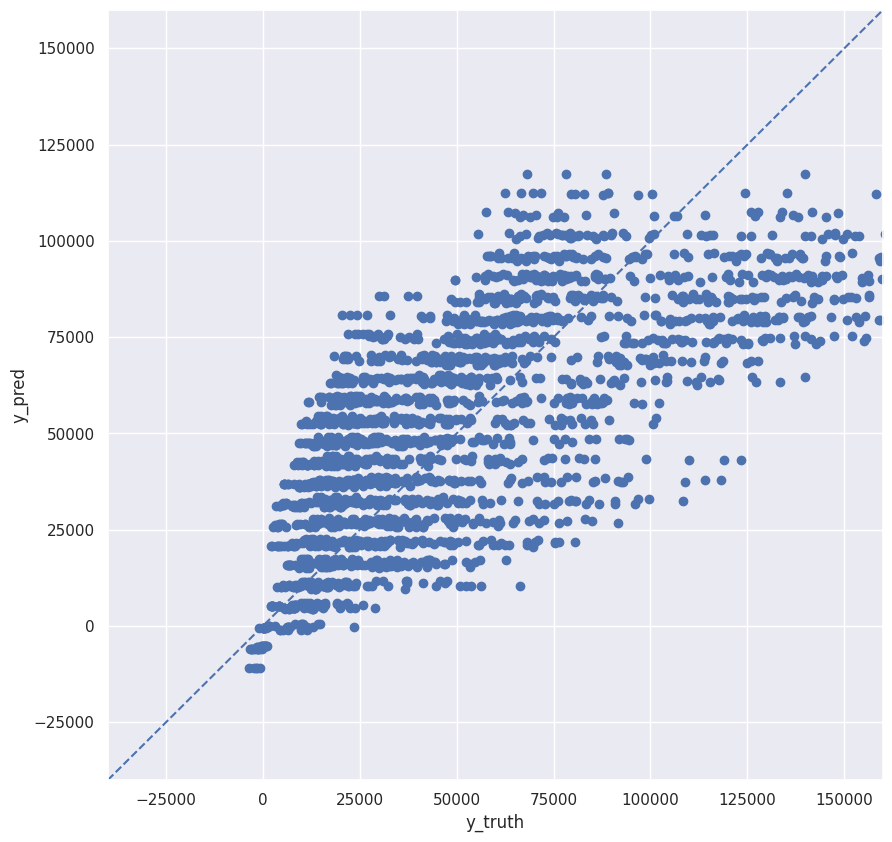

In [296]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred)

plt.xlabel("y_truth")
plt.ylabel("y_pred")
plt.ylim((-40000,160000))
plt.xlim((-40000,160000))
plt.axline((0,0), slope = 1, ls="--")

In [297]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 2215 to 1896
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Combination                   2528 non-null   object 
 1   Code                          2528 non-null   object 
 2   EW_Code                       2528 non-null   object 
 3   IW_Code                       2528 non-null   object 
 4   ES_Code                       2528 non-null   object 
 5   IS_Code                       2528 non-null   object 
 6   RO_Code                       2528 non-null   object 
 7   EW_A-D/m²                     2528 non-null   float64
 8   IW_A-D/m²                     2528 non-null   float64
 9   ES_A-D/m²                     2528 non-null   float64
 10  IS_A-D/m²                     2528 non-null   float64
 11  RO_A-D/m²                     2528 non-null   float64
 12  ITERATION                     2528 non-null   object 
 13  ID   

In [298]:
data_test['GWP_Pred_reg'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='GWP_A-D', # Changed from 'GWP_score' to 'GWP_A-D', assuming 'GWP_A-D' contains the GWP score. Please update with the actual column name if different.
    y='GWP_Pred_reg', # Changed from 'GWPPred_reg' to 'GWP_pred' to match the assigned column name.
    color=alt.Color('GWP_A-D', scale=alt.Scale(scheme='category10')),
    tooltip=['VOLUME_M3', 'COMPACTNESS']
).interactive()

Output hidden; open in https://colab.research.google.com to view.

Let's try a different model class

In [299]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

0.6779325932115586


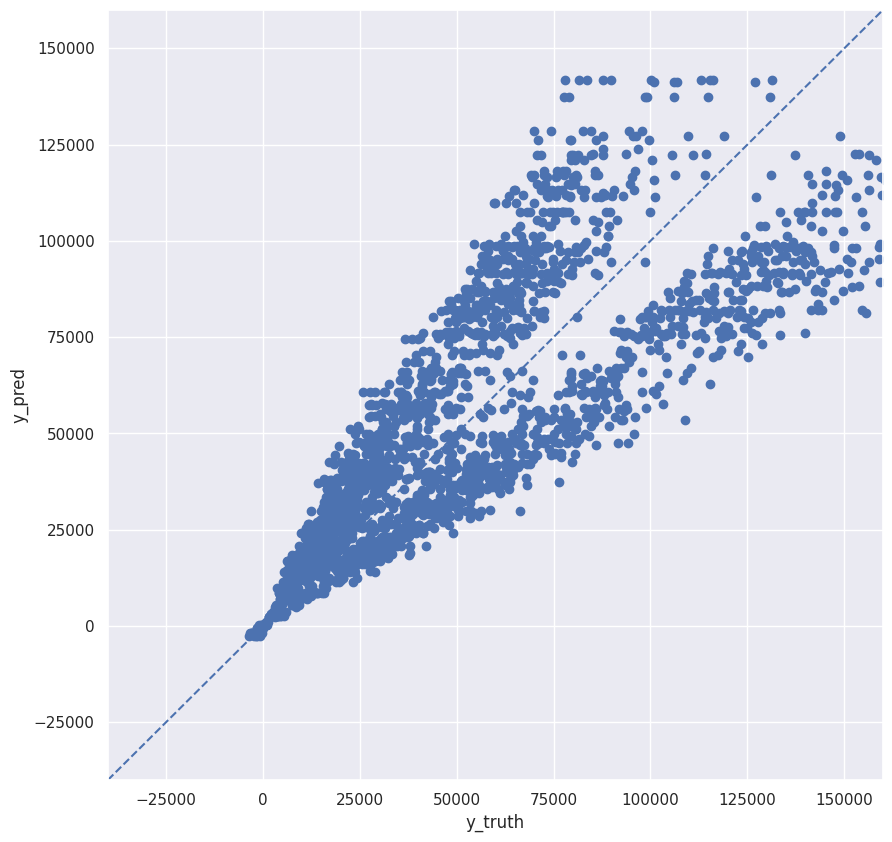

In [300]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred)

plt.xlabel("y_truth")
plt.ylabel("y_pred")
plt.ylim((-40000,160000))
plt.xlim((-40000,160000))
plt.axline((0,0), slope = 1, ls="--")

In [301]:
data_test['GWP_Pred_xg'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='GWP_A-D', # Changed from 'GWP_score' to 'GWP_A-D', assuming 'GWP_A-D' contains the GWP score. Please update with the actual column name if different.
    y='GWP_Pred_xg', # Changed from 'GWPPred_reg' to 'GWP_pred' to match the assigned column name.
    color=alt.Color('GWP_A-D', scale=alt.Scale(scheme='category10')),
    tooltip=['VOLUME_M3', 'COMPACTNESS']
).interactive()

Output hidden; open in https://colab.research.google.com to view.

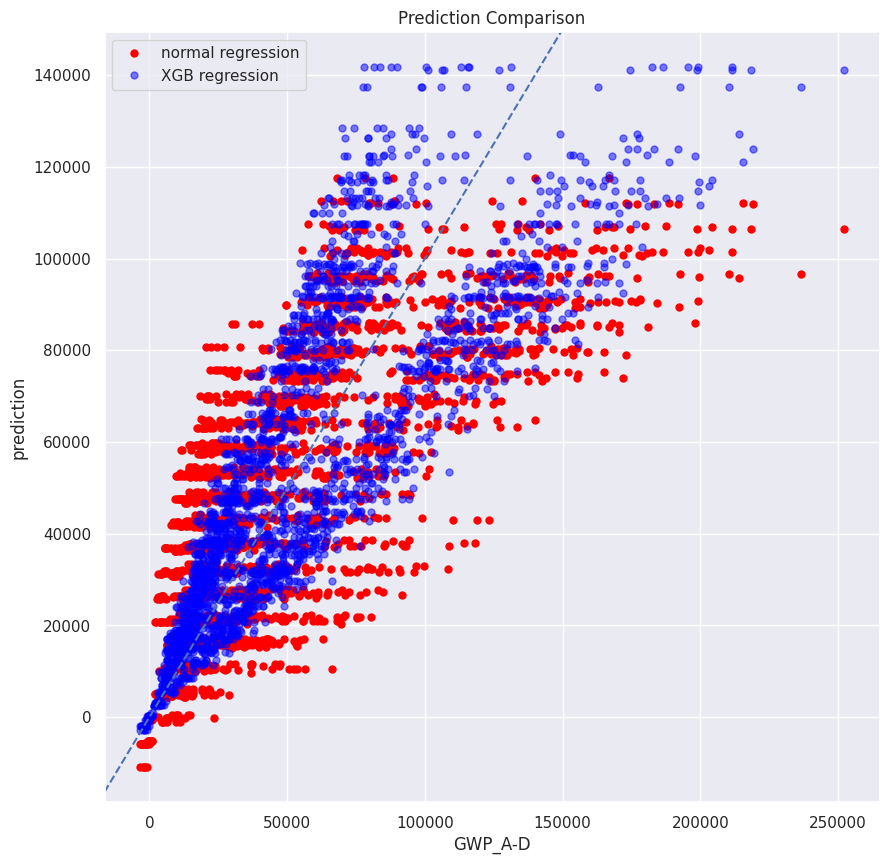

In [302]:
#Comparative plot
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(data_test["GWP_A-D"], data_test["GWP_Pred_reg"], color = "red", label = "normal regression",linestyle='None', marker = "o", markersize = 5)
ax1.plot(data_test["GWP_A-D"], data_test["GWP_Pred_xg"], color = "blue", label = "XGB regression",linestyle='None',marker = "o", markersize = 5, alpha= 0.5)


ax1.set_xlabel('GWP_A-D')
ax1.set_ylabel('prediction')
ax1.legend()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.axline((0,0), slope = 1, ls="--")

plt.title('Prediction Comparison')
plt.show()